# Exercise #14

### Task 1

For each review included in the dataset, use `spacytextblob` and its inherent document-level scores to get the polarity score of the text. Create a violinplot with the x-axis being individual reviews' star rating, and the y-axis being the calculated polarity scores. Interpret the results. 

In [1]:
###Getting Data
import os
import numpy as np
import pandas as pd
import spacy
import re
import glob
import json
from tqdm import tqdm
import spacy
nlp = spacy.load('en_core_web_sm')
from spacytextblob.spacytextblob import SpacyTextBlob
nlp.add_pipe('spacytextblob')
os.chdir('/Users/[editted]/Desktop/SOCDATA/Exercise_14/')


In [11]:
###Analysis
review_ids = []
ratings = []
polarity_scores = []
subjective_scores = []

with open('yelp_academic_dataset_review_Nov2022_small.jsonl', 'r') as f:
    line_index = 0
    for line in tqdm(f):
        line_index += 1
        review_dict = json.loads(line)

        review = review_dict['text']
        rating = review_dict['stars']
        review_id = review_dict['review_id']

        review_doc = nlp(review)
        subjective_phrases_in_doc = []
        polarity_score = 0
        subjective_score = 0
        for assess_tuple in review_doc._.blob.sentiment_assessments.assessments:
            subjective_phrases_in_doc.append(' '.join(assess_tuple[0]))
            polarity_score += assess_tuple[1]
            subjective_score += assess_tuple[2]

        ratings.append(rating)
        polarity_scores.append(polarity_score)
        subjective_scores.append(subjective_score)
        review_ids.append(review_id)

10000it [03:04, 54.24it/s]


In [18]:
###Getting Dataframe
import pandas as pd

yelp_df = pd.DataFrame(columns=['review_id', 'rating', 'polarity_score', 'subjective_score'])
yelp_df['rating'] = ratings
yelp_df['review_id'] = review_ids
yelp_df['polarity_score'] = polarity_scores
yelp_df['subjective_score'] = subjective_scores
yelp_df
# max(yelp_df['polarity_score'])

,review_id,rating,polarity_score,subjective_score
0,KU_O5udG6zpxOg-VcAEodg,3.0,1.023333,5.148333
1,BiTunyQ73aT9WBnpR9DZGw,5.0,4.425000,6.283333
2,saUsX_uimxRlCVr67Z4Jig,3.0,1.539286,5.745238
3,AqPFMleE6RsU23_auESxiA,5.0,2.420455,5.704545
4,Sx8TMOWLNuJBWer-0pcmoA,4.0,5.613571,6.872857
...,...,...,...,...
9995,ZcBtCA9jGhLfakf1jJ2BAg,5.0,1.800000,1.875000
9996,UIkEO-10J6Y99IhRqUflvg,5.0,0.600000,0.900000
9997,S-NQM3Axcg8JS3MXHUIvyw,5.0,1.097727,6.900758
9998,ME79YrEhm2xe4IQy_0zkGw,5.0,2.812500,4.800000


<AxesSubplot:xlabel='rating', ylabel='polarity_score'>

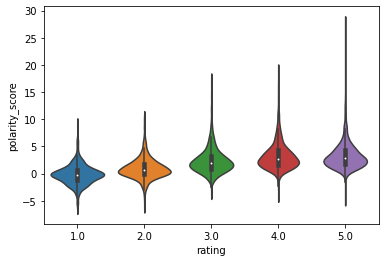

In [16]:
###Creating Violin Plot
import seaborn as sns
import matplotlib.style as style
sns.violinplot(y='polarity_score', x='rating', data=yelp_df)

### Task 2

For each review included in the dataset, extract the subjective phrases in the text using  `spacytextblob` and its `
sentiment_assessments.assessments` feature. Then, for each review whose review_id is in the following `target_review_ids` list, find the top 3 reviews that are most similar to it in terms of their subjective phrases. 

In [86]:
from spacytextblob.spacytextblob import SpacyTextBlob

In [3]:
###Creating Dataframe

review_lst = []

with open('yelp_academic_dataset_review_Nov2022_small.jsonl', 'r') as f:
    for line in f:
        review_d = json.loads(line)
        review_lst.append(review_d)

review_id = []
review_text = []
rating_rating = []

for index in range(len(review_lst)):
    review_id.append(review_lst[index]["review_id"])
    review_text.append(review_lst[index]["text"])
    rating_rating.append(review_lst[index]["stars"])


review_df = pd.DataFrame(columns=['review_id', 'text','rating'])
review_df['review_id'] = review_id
review_df['text'] = review_text
review_df['rating'] = rating_rating
review_df

,review_id,text,rating
0,KU_O5udG6zpxOg-VcAEodg,"If you decide to eat here, just be aware it is...",3.0
1,BiTunyQ73aT9WBnpR9DZGw,I've taken a lot of spin classes over the year...,5.0
2,saUsX_uimxRlCVr67Z4Jig,Family diner. Had the buffet. Eclectic assortm...,3.0
3,AqPFMleE6RsU23_auESxiA,"Wow! Yummy, different, delicious. Our favo...",5.0
4,Sx8TMOWLNuJBWer-0pcmoA,Cute interior and owner (?) gave us tour of up...,4.0
...,...,...,...
9995,ZcBtCA9jGhLfakf1jJ2BAg,Excellent food and service. The place is funct...,5.0
9996,UIkEO-10J6Y99IhRqUflvg,Just about to get tucked into a meatloaf that ...,5.0
9997,S-NQM3Axcg8JS3MXHUIvyw,Outstanding customer service! And my car is dr...,5.0
9998,ME79YrEhm2xe4IQy_0zkGw,I and my husband went here for Dinner one day ...,5.0


In [96]:
vocab_with_freq = dict()
for i in tqdm(range(len(review_df))):
    review_title = review_df.loc[i, 'text'] #Looping through all the rows
    for token in nlp(review_title):
        if token.is_alpha:
            vocab_with_freq[token.lemma_.lower()] = vocab_with_freq.get(token.lemma_.lower(), 0) + 1

vocabulary_list = list(vocab_with_freq.keys())
# vocabulary_list

100%|█████████████████████████████████████| 10000/10000 [03:08<00:00, 52.97it/s]


In [97]:
one_hot_encodings = []

for i in tqdm(range(len(review_df))):
    review_title = review_df.loc[i, 'text'] # take one example first
    token_indices = []

    for token in nlp(review_title):
        if token.is_alpha and token.lemma_.lower() in vocabulary_list:
            token_index_in_vocab = vocabulary_list.index(token.lemma_.lower())
            token_indices.append(token_index_in_vocab)


    one_hot_encoding = np.zeros(len(vocabulary_list))
    for token_index in token_indices:
        one_hot_encoding[token_index] = 1

    one_hot_encodings.append(one_hot_encoding)

100%|█████████████████████████████████████| 10000/10000 [03:30<00:00, 47.60it/s]


In [105]:
from scipy.spatial.distance import cosine
title_a_lst = []
for index in range(len(target_review)):
    title_a = target_review.loc[index, 'review_id']
    title_a_lst.append(title_a)
    
similarity_values = []

for i in range(1, len(review_df)):
    similarity_value = 1 - cosine(one_hot_encodings[0], one_hot_encodings[i])
    similarity_values.append(similarity_value)
# similarity_values

In [104]:
similar_df = pd.DataFrame(columns=['id', 'similarity_value_with_one_hot'])

for index in range(len(title_a_lst)):
    print('the primary job title:', title_a_lst[index])
    similar_df['id'] = review_df.loc[1:, 'review_id']
    similar_df['similarity_value_with_one_hot'] = similarity_values
    similar_df_new=similar_df.sort_values(by='similarity_value_with_one_hot', ascending=False)
    print(similar_df_new[0:3])

# similar_df.sort_values(by='similarity_value_with_one_hot', ascending=False)

the primary job title: 40thYphUgIfvJq17QCfTwA
                          id  similarity_value_with_one_hot
3469  OKKzU3bf1S67pl1u5A16xA                       0.466387
8232  SF-zNgY2uR4HkPRn6_DVEA                       0.431547
4196  aIkwHOOldvkQFo6-_EU4Yw                       0.426746
the primary job title: E9AB7V4z8xrt2uPF7T55FQ
                          id  similarity_value_with_one_hot
3469  OKKzU3bf1S67pl1u5A16xA                       0.466387
8232  SF-zNgY2uR4HkPRn6_DVEA                       0.431547
4196  aIkwHOOldvkQFo6-_EU4Yw                       0.426746
the primary job title: 4KpIldEM-tdnrJLqYzRfZQ
                          id  similarity_value_with_one_hot
3469  OKKzU3bf1S67pl1u5A16xA                       0.466387
8232  SF-zNgY2uR4HkPRn6_DVEA                       0.431547
4196  aIkwHOOldvkQFo6-_EU4Yw                       0.426746
the primary job title: PDHRlnEdkEcwATry4w71PQ
                          id  similarity_value_with_one_hot
3469  OKKzU3bf1S67pl1u5A16xA        